# MTA and Covid-19 EDA

In [141]:
import urllib.request
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import os

%config InlineBackend.figure_format = "svg"

Import Covid-19 data for a reference to pull MTA data later:

In [131]:
covid_data = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/trends/data-by-day.csv')

In [132]:
covid_data

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,...,SI_PROBABLE_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_PROBABLE_DEATH_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,SI_ALL_DEATH_COUNT_7DAY_AVG,INCOMPLETE
0,02/29/2020,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,03/01/2020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,03/02/2020,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,03/03/2020,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03/04/2020,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,03/25/2021,3495,1323,250,58,10,2918,4076,248,48,...,88,17,3,0,231,307,17,3,3,11000
391,03/26/2021,3022,1170,257,52,14,2928,4097,254,49,...,66,24,6,0,232,310,18,4,4,11000
392,03/27/2021,1891,935,226,35,17,2907,4071,252,47,...,75,7,1,0,236,314,17,3,3,11000
393,03/28/2021,1445,822,99,41,15,2830,3984,231,47,...,57,10,5,1,228,306,16,4,4,11000


In [32]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   date_of_interest                394 non-null    object
 1   CASE_COUNT                      394 non-null    int64 
 2   PROBABLE_CASE_COUNT             394 non-null    int64 
 3   HOSPITALIZED_COUNT              394 non-null    int64 
 4   DEATH_COUNT                     394 non-null    int64 
 5   PROBABLE_DEATH_COUNT            394 non-null    int64 
 6   CASE_COUNT_7DAY_AVG             394 non-null    int64 
 7   ALL_CASE_COUNT_7DAY_AVG         394 non-null    int64 
 8   HOSP_COUNT_7DAY_AVG             394 non-null    int64 
 9   DEATH_COUNT_7DAY_AVG            394 non-null    int64 
 10  ALL_DEATH_COUNT_7DAY_AVG        394 non-null    int64 
 11  BX_CASE_COUNT                   394 non-null    int64 
 12  BX_PROBABLE_CASE_COUNT          394 non-null    in

I'll drop the borough-specific data I won't be using to make the table more readable, then make a chart of new daily cases over time.

In [33]:
covid_data.drop(covid_data.columns[range(11, 62)], axis = 1, inplace = True)
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date_of_interest          394 non-null    object
 1   CASE_COUNT                394 non-null    int64 
 2   PROBABLE_CASE_COUNT       394 non-null    int64 
 3   HOSPITALIZED_COUNT        394 non-null    int64 
 4   DEATH_COUNT               394 non-null    int64 
 5   PROBABLE_DEATH_COUNT      394 non-null    int64 
 6   CASE_COUNT_7DAY_AVG       394 non-null    int64 
 7   ALL_CASE_COUNT_7DAY_AVG   394 non-null    int64 
 8   HOSP_COUNT_7DAY_AVG       394 non-null    int64 
 9   DEATH_COUNT_7DAY_AVG      394 non-null    int64 
 10  ALL_DEATH_COUNT_7DAY_AVG  394 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 34.0+ KB


([<matplotlib.axis.XTick at 0x7fe2089969a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

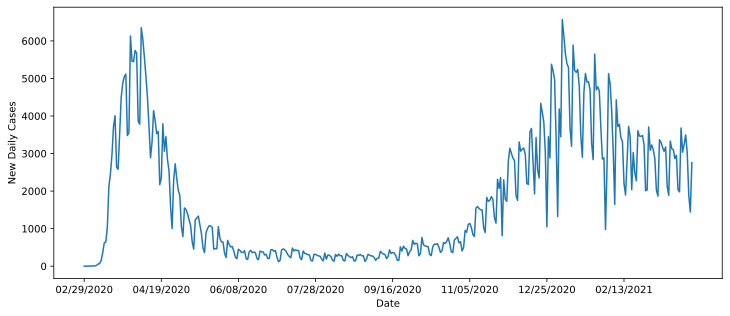

In [152]:
plt.figure(figsize=(12,5))
plt.plot(covid_data["date_of_interest"], covid_data["CASE_COUNT"])
plt.ylabel("New Daily Cases")
plt.xlabel("Date")
plt.xticks(np.arange(0, 400, 50))

I want to make sure I get as much of the peaks of the data in my analysis, so I'll only use the first year of the data, and will download the MTA data for the corresponding time period in both 2019-20 and 2020-21.

In [35]:
covid_sample = covid_data.head(365)
covid_sample

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,ALL_DEATH_COUNT_7DAY_AVG
0,02/29/2020,1,0,1,0,0,0,0,0,0,0
1,03/01/2020,0,0,1,0,0,0,0,0,0,0
2,03/02/2020,0,0,2,0,0,0,0,0,0,0
3,03/03/2020,1,0,7,0,0,0,0,0,0,0
4,03/04/2020,5,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
360,02/23/2021,3468,1067,345,71,7,2907,3825,311,66,70
361,02/24/2021,3460,1001,364,80,3,2909,3822,320,66,69
362,02/25/2021,3478,988,303,74,7,3115,4054,325,69,73
363,02/26/2021,3241,989,325,71,3,3146,4083,326,71,75


Now, the MTA data is formatted as: "http://web.mta.info/developers/data/nyct/turnstile/turnstile_YMMdd.txt". I'd like to download the 100+ data files without having to manually enter every date. I know that every date is a Saturday, so I can use Python to get the date of every Saturday within the timeframe I want. For the purpose of analysis, I will keep two separate tables of data for each year I want to compare with each other.

Note: this uses Pandas' extremely handy [date_range](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html) function.

In [10]:
os.makedirs("data/year_1")
os.makedirs("data/year_2")

In [17]:
year_1 = pd.date_range(start = "02/29/2020", end = "02/27/2021", freq = "W-SAT").strftime("%y%m%d").tolist()
print(year_1)

for date in year_1:
    urllib.request.urlretrieve(f"http://web.mta.info/developers/data/nyct/turnstile/turnstile_{date}.txt",
                               f"data/year_1/turnstile_{date}.txt")

['200229', '200307', '200314', '200321', '200328', '200404', '200411', '200418', '200425', '200502', '200509', '200516', '200523', '200530', '200606', '200613', '200620', '200627', '200704', '200711', '200718', '200725', '200801', '200808', '200815', '200822', '200829', '200905', '200912', '200919', '200926', '201003', '201010', '201017', '201024', '201031', '201107', '201114', '201121', '201128', '201205', '201212', '201219', '201226', '210102', '210109', '210116', '210123', '210130', '210206', '210213', '210220', '210227']


In [12]:
year_2 = pd.date_range(start = "02/23/2019", end = "02/22/2020", freq = "W-SAT").strftime("%y%m%d").tolist()
print(year_2)

for date in year_2:
    urllib.request.urlretrieve(f"http://web.mta.info/developers/data/nyct/turnstile/turnstile_{date}.txt",
                               f"data/year_2/turnstile_{date}.txt")

['190223', '190302', '190309', '190316', '190323', '190330', '190406', '190413', '190420', '190427', '190504', '190511', '190518', '190525', '190601', '190608', '190615', '190622', '190629', '190706', '190713', '190720', '190727', '190803', '190810', '190817', '190824', '190831', '190907', '190914', '190921', '190928', '191005', '191012', '191019', '191026', '191102', '191109', '191116', '191123', '191130', '191207', '191214', '191221', '191228', '200104', '200111', '200118', '200125', '200201', '200208', '200215', '200222']


Note: the above downloads about 3GB of data, so be aware it might take some time to complete if you have a slower internet connection.

In [41]:
print(not set(year_1).isdisjoint(year_2)) # check if lists have any common elements

False


Combining our data and converting it into an SQL database format:

In [36]:
def combine_files(path, dates):
    dfs = []
    for d in dates:
        file = f"{path}/turnstile_{d}.txt"
        dfs.append(pd.read_csv(file))
    return pd.concat(dfs)

In [37]:
mta_2020 = combine_files("data/year_1", year_1)
mta_2020.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/22/2020,03:00:00,RECOVR AUD,7386928,2505750
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/22/2020,07:00:00,RECOVR AUD,7386935,2505759
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/22/2020,11:00:00,RECOVR AUD,7386975,2505840
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/22/2020,15:00:00,RECOVR AUD,7387107,2505884
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/22/2020,19:00:00,REGULAR,7387394,2505952


In [38]:
mta_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11058882 entries, 0 to 209926
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                          

In [39]:
mta_2019 = combine_files("data/year_2", year_2)
mta_2019.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,03:00:00,REGULAR,6947666,2356412
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,07:00:00,REGULAR,6947678,2356425
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,11:00:00,REGULAR,6947737,2356508
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,15:00:00,REGULAR,6947883,2356549
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/16/2019,19:00:00,REGULAR,6948186,2356599


In [40]:
mta_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10898759 entries, 0 to 206182
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                          

In [44]:
mta_2020.DATE.value_counts().sort_index()

01/01/2021    30696
01/02/2021    30595
01/03/2021    29807
01/04/2021    29779
01/05/2021    29802
              ...  
12/27/2020    29971
12/28/2020    30150
12/29/2020    29877
12/30/2020    29953
12/31/2020    29976
Name: DATE, Length: 371, dtype: int64

In [45]:
mta_2019.DATE.value_counts().sort_index()

01/01/2020    29428
01/02/2020    30048
01/03/2020    29261
01/04/2020    29439
01/05/2020    29848
              ...  
12/27/2019    29423
12/28/2019    29437
12/29/2019    29384
12/30/2019    29607
12/31/2019    29334
Name: DATE, Length: 371, dtype: int64

In [55]:
# Check for duplicate rows
(mta_2020
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE", "TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False))

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES
7447639,R145,R032,00-00-02,TIMES SQ-42 ST,02/04/2021,23:00:00,2
7447633,R145,R032,00-00-02,TIMES SQ-42 ST,02/03/2021,23:00:00,2
7447621,R145,R032,00-00-02,TIMES SQ-42 ST,02/01/2021,23:00:00,2
7447622,R145,R032,00-00-02,TIMES SQ-42 ST,02/02/2021,03:00:00,2
7447623,R145,R032,00-00-02,TIMES SQ-42 ST,02/02/2021,07:00:00,2
...,...,...,...,...,...,...,...
3686282,N131,R383,00-00-02,80 ST,04/05/2020,05:00:00,1
3686283,N131,R383,00-00-02,80 ST,04/05/2020,09:00:00,1
3686284,N131,R383,00-00-02,80 ST,04/05/2020,13:00:00,1
3686285,N131,R383,00-00-02,80 ST,04/05/2020,17:00:00,1


There some duplicates, so I'll drop them.

In [60]:
mta_2020.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE", "TIME"], 
                          inplace=True, ascending=False)
mta_2020.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE", "TIME"], inplace=True)

In [61]:
(mta_2020
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE", "TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False))

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,01/01/2021,03:00:00,1
7372529,R138,R293,00-03-01,34 ST-PENN STA,03/05/2020,21:00:00,1
7372521,R138,R293,00-03-01,34 ST-PENN STA,03/04/2020,13:00:00,1
7372522,R138,R293,00-03-01,34 ST-PENN STA,03/04/2020,17:00:00,1
7372523,R138,R293,00-03-01,34 ST-PENN STA,03/04/2020,21:00:00,1
...,...,...,...,...,...,...,...
3686265,N131,R383,00-00-02,80 ST,04/02/2020,09:00:00,1
3686266,N131,R383,00-00-02,80 ST,04/02/2020,13:00:00,1
3686267,N131,R383,00-00-02,80 ST,04/02/2020,17:00:00,1
3686268,N131,R383,00-00-02,80 ST,04/02/2020,21:00:00,1


Our data looks better now, so now I want to get the information I'm really looking for- the total number of subway rides each day throughout the entire city. My plan to do this is to sort each unique turnstile by day, and subtract the highest number of cumulative entries (or exits) for that day from the lowest. This difference should represent the new entries at that turnstile, and adding all of these up should represent such for the entire city.

In [63]:
(mta_2020
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"])
 .max("ENTRIES"))

ENTRIES  \
C/A   UNIT SCP      STATION       DATE                  
A002  R051 02-00-00 59 ST         01/01/2021  7511647   
                                  01/02/2021  7511996   
                                  01/03/2021  7512214   
                                  01/04/2021  7512754   
                                  01/05/2021  7513300   
...                                               ...   
TRAM2 R469 00-05-01 RIT-ROOSEVELT 12/27/2020     5554   
                                  12/28/2020     5554   
                                  12/29/2020     5554   
                                  12/30/2020     5554   
                                  12/31/2020     5554   

                                              EXITS                                                                 
C/A   UNIT SCP      STATION       DATE                                                                              
A002  R051 02-00-00 59 ST         01/01/2021                                            2558865                     
                                  01/02/2021                                            2559007                     
                                  01/03/2021                                            2559091                     
                                  01/04/2021                                            2559328                     
                                  01/05/2021                                            2559580                     
...                                                                                         ...                     
TRAM2 R469 00-05-01 RIT-ROOSEVELT 12/27/2020                                                541                     
                                  12/28/2020                                                541                     
                                  12/29/2020                                                541                     
                                  12/30/2020                                                541                     
                                  12/31/2020                                                541                     

[1835811 rows x 2 columns]

In [64]:
(mta_2020
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"])
 .min("ENTRIES"))

ENTRIES  \
C/A   UNIT SCP      STATION       DATE                  
A002  R051 02-00-00 59 ST         01/01/2021  7511448   
                                  01/02/2021  7511653   
                                  01/03/2021  7512008   
                                  01/04/2021  7512222   
                                  01/05/2021  7512764   
...                                               ...   
TRAM2 R469 00-05-01 RIT-ROOSEVELT 12/27/2020     5554   
                                  12/28/2020     5554   
                                  12/29/2020     5554   
                                  12/30/2020     5554   
                                  12/31/2020     5554   

                                              EXITS                                                                 
C/A   UNIT SCP      STATION       DATE                                                                              
A002  R051 02-00-00 59 ST         01/01/2021                                            2558786                     
                                  01/02/2021                                            2558871                     
                                  01/03/2021                                            2559008                     
                                  01/04/2021                                            2559094                     
                                  01/05/2021                                            2559333                     
...                                                                                         ...                     
TRAM2 R469 00-05-01 RIT-ROOSEVELT 12/27/2020                                                541                     
                                  12/28/2020                                                541                     
                                  12/29/2020                                                541                     
                                  12/30/2020                                                541                     
                                  12/31/2020                                                541                     

[1835811 rows x 2 columns]

Credit for the code that finds the difference: https://stackoverflow.com/questions/40183800/pandas-difference-between-largest-and-smallest-value-within-group/40183861

In [75]:
new_entries_2020 = (mta_2020
    .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"])["ENTRIES"]
    .agg(['min','max']).diff(axis = 1))
new_entries_2020

min  max
C/A   UNIT SCP      STATION       DATE                
A002  R051 02-00-00 59 ST         01/01/2021  NaN  199
                                  01/02/2021  NaN  343
                                  01/03/2021  NaN  206
                                  01/04/2021  NaN  532
                                  01/05/2021  NaN  536
...                                           ...  ...
TRAM2 R469 00-05-01 RIT-ROOSEVELT 12/27/2020  NaN    0
                                  12/28/2020  NaN    0
                                  12/29/2020  NaN    0
                                  12/30/2020  NaN    0
                                  12/31/2020  NaN    0

[1835811 rows x 2 columns]

We should check that this data doesn't have any severe outliers.

In [76]:
new_entries_2020.describe()

,min,max
count,0.0,1.835811e+06
mean,NaN,1.984507e+04
std,NaN,4.729142e+06
min,NaN,0.000000e+00
25%,NaN,3.000000e+01
50%,NaN,1.320000e+02
75%,NaN,3.240000e+02
max,NaN,1.895328e+09


That max value doesn't seem quite right- 1,000,000,000 entries at a *single* turnstile in a one day is far too many.

In [101]:
new_entries_2020.sort_values("max", ascending=False).head()

min         max
C/A  UNIT SCP      STATION         DATE                       
R311 R053 00-00-03 3 AV-149 ST     07/03/2020  NaN  1895327587
N094 R029 01-03-00 WORLD TRADE CTR 08/07/2020  NaN  1879048211
R307 R207 01-00-02 135 ST          12/29/2020  NaN  1821543301
N203 R195 00-00-00 161/YANKEE STAD 06/22/2020  NaN  1627398252
                                   05/27/2020  NaN  1621027042

In [115]:
new_entries_2020[new_entries_2020["max"] > 5000]

min      max
C/A   UNIT SCP      STATION         DATE                    
A002  R051 02-05-00 59 ST           03/17/2020  NaN   524136
A006  R079 00-00-04 5 AV/59 ST      04/13/2020  NaN  7896783
           00-03-00 5 AV/59 ST      03/10/2020  NaN  9438021
A007  R079 01-06-03 5 AV/59 ST      04/07/2020  NaN  7832207
A010  R080 00-00-07 57 ST-7 AV      02/24/2020  NaN     5636
...                                             ...      ...
R628  R064 00-00-04 SARATOGA AV     07/21/2020  NaN  1735490
R633  R068 00-00-01 VAN SICLEN AV   07/24/2020  NaN    30990
R647  R110 02-05-00 FLATBUSH AV-B.C 09/22/2020  NaN  1185229
           02-05-01 FLATBUSH AV-B.C 09/27/2020  NaN   167269
TRAM1 R468 00-00-01 RIT-MANHATTAN   05/26/2020  NaN    53363

[788 rows x 2 columns]

Choosing the limit to be 5,000 was admittedly arbitrary, but 788 is a miniscule number of rows to lose out of the ~1.8 million of the entire table. A turnstile with 5,000 entries in 24 hours would require someone to go through it about every 17 seconds, which at least seems physically possible.

In [118]:
new_entries_2020.drop(new_entries_2020[new_entries_2020["max"] > 5000].index, inplace = True)
new_entries_2020.sort_values("max", ascending=False).head(30)

min   max
C/A   UNIT SCP      STATION         DATE                 
R238A R046 02-03-00 GRD CNTRL-42 ST 03/11/2020  NaN  4962
           02-00-02 GRD CNTRL-42 ST 03/11/2020  NaN  4953
N606  R025 00-00-07 JAMAICA CENTER  02/24/2020  NaN  4952
N329  R201 00-00-01 WOODHAVEN BLVD  02/28/2020  NaN  4943
A010  R080 00-00-07 57 ST-7 AV      03/06/2020  NaN  4941
N329  R201 00-00-01 WOODHAVEN BLVD  02/27/2020  NaN  4941
PTH03 R552 00-01-08 JOURNAL SQUARE  09/28/2020  NaN  4938
R530  R310 00-00-03 111 ST          03/07/2020  NaN  4935
N606  R025 00-00-07 JAMAICA CENTER  03/05/2020  NaN  4908
           00-00-06 JAMAICA CENTER  03/12/2020  NaN  4899
N063A R011 00-00-06 42 ST-PORT AUTH 02/26/2020  NaN  4886
N606  R025 00-00-07 JAMAICA CENTER  03/04/2020  NaN  4883
N701  R571 00-00-00 86 ST-2 AVE     03/05/2020  NaN  4881
N063A R011 00-00-06 42 ST-PORT AUTH 02/24/2020  NaN  4880
N700  R570 00-03-03 72 ST-2 AVE     03/04/2020  NaN  4872
R240  R047 00-00-01 GRD CNTRL-42 ST 02/25/2020  NaN  4871
H009  R235 00-03-04 BEDFORD AV      03/03/2020  NaN  4866
N051  R084 02-00-01 59 ST COLUMBUS  03/06/2020  NaN  4865
N063A R011 00-00-06 42 ST-PORT AUTH 02/27/2020  NaN  4864
H009  R235 00-03-04 BEDFORD AV      03/09/2020  NaN  4854
N606  R025 00-00-07 JAMAICA CENTER  03/03/2020  NaN  4849
                                    02/27/2020  NaN  4846
A033  R170 02-00-05 14 ST-UNION SQ  02/24/2020  NaN  4845
N701  R571 00-00-00 86 ST-2 AVE     02/25/2020  NaN  4833
A033  R170 02-00-05 14 ST-UNION SQ  03/11/2020  NaN  4832
R238A R046 02-00-00 GRD CNTRL-42 ST 03/04/2020  NaN  4824
N063A R011 00-00-06 42 ST-PORT AUTH 03/03/2020  NaN  4824
N701  R571 00-00-00 86 ST-2 AVE     03/04/2020  NaN  4816
N329  R201 00-03-00 WOODHAVEN BLVD  03/11/2020  NaN  4814
R530  R310 00-00-00 111 ST          03/08/2020  NaN  4811

Now I'll add up all of the new entries at each station per day.

In [123]:
station_entries_2020 = new_entries_2020.groupby(["STATION", "DATE"])[['max']].sum().reset_index()
station_entries_2020.sort_values("max", ascending = False)

,STATION,DATE,max
22676,34 ST-PENN STA,02/27/2020,155076
22674,34 ST-PENN STA,02/26/2020,153962
22672,34 ST-PENN STA,02/25/2020,152669
22681,34 ST-PENN STA,03/03/2020,149033
22670,34 ST-PENN STA,02/24/2020,147660
...,...,...,...
111355,NEWARK HM HE,04/02/2020,0
47519,AVENUE I,02/21/2021,0
47518,AVENUE I,02/20/2021,0
108635,NEPTUNE AV,12/06/2020,0


That's a lot of passengers at the top, but it's at Penn Station, which makes sense. The [MTA website](http://web.mta.info/nyct/facts/ridership/ridership_sub.htm) has a chart showing average riders at each station, with Penn Station getting about 90,000 on average; 155,000 seems well within reach as a peak value, just going by common sense.

In [126]:
total_entries_2020 = station_entries_2020.groupby(["DATE"])[['max']].sum().reset_index()
total_entries_2020

,DATE,max
0,01/01/2021,550574
1,01/02/2021,865415
2,01/03/2021,571974
3,01/04/2021,1433330
4,01/05/2021,1472225
...,...,...
366,12/27/2020,670330
367,12/28/2020,1389609
368,12/29/2020,1429197
369,12/30/2020,1444365


([<matplotlib.axis.XTick at 0x7fe20893f040>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

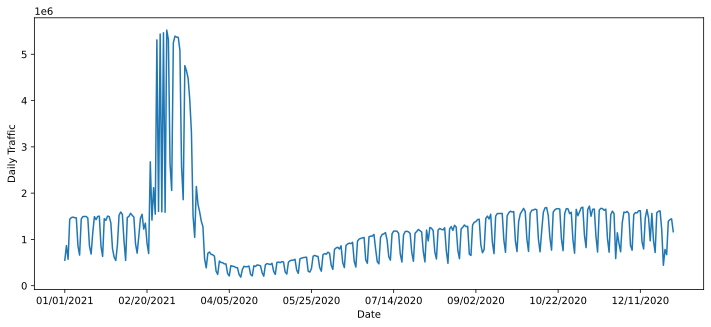

In [153]:
plt.figure(figsize=(12,5))
plt.plot(total_entries_2020["DATE"], total_entries_2020["max"])
plt.ylabel("Daily Traffic")
plt.xlabel("Date")
plt.xticks(np.arange(0, 400, 50))

<Figure size 864x360 with 0 Axes>

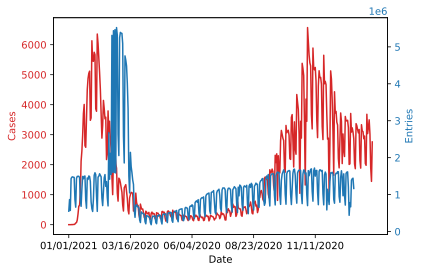

In [154]:
plt.figure(figsize=(12, 5))

fig, ax1 = plt.subplots()

color = "tab:red"
ax1.set_xlabel("Date")
ax1.set_ylabel("Cases", color = color)
ax1.plot(covid_data["date_of_interest"], covid_data["CASE_COUNT"], color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()

color = "tab:blue"
ax2.set_ylabel("Entries", color = color)
ax2.plot(total_entries_2020["DATE"], total_entries_2020["max"], color = color)
ax2.tick_params(axis = 'y', labelcolor = color)

plt.xticks(np.arange(0, 400, 80))

#fig.tight_layout()
plt.show()

The main idea I get from this data is that shortly after cases began to rise, there was a large surge of MTA usage, followed by a lower amount that slowly increased over time. This indicates that there was a conscious response to the first spike in cases. The second spike of cases also appears to have some positive relationship with the increased use of the MTA over time through the year.